# 1 - first test:
$$
\frac{dy}{dt}=-t y^2
$$

We test solving this Ode with 2 differents methods: 
- Explicit Euler
- Ensemble Kalman Filter (EnKF)

**Use Explicit Euler**

The explicit Euler method produces a smooth and stable trajectory that gradually decreases over time.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal
from filterpy.kalman import EnsembleKalmanFilter as EnKF
from filterpy.common import Q_discrete_white_noise

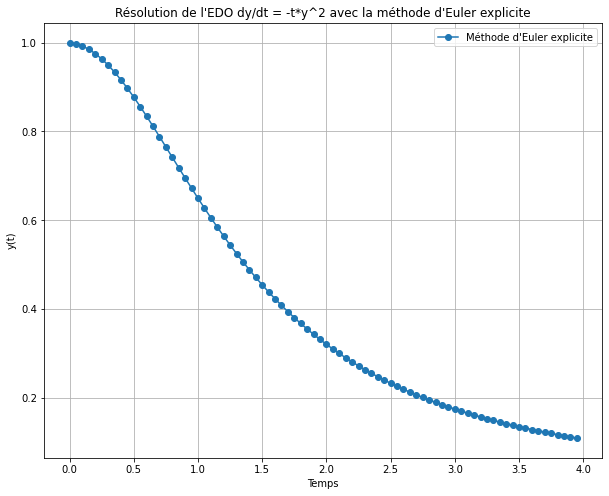

In [2]:
# Paramètres
dt = 0.05  # Pas de temps
T = 4.0  # Durée totale de la simulation

# Conditions initiales
y0 = 1.0  # Valeur initiale de y à t=0

# Nombre de pas de temps
num_steps = int(T / dt)

# Initialisation du tableau pour stocker les valeurs de y
y_euler = np.zeros(num_steps)
y_euler[0] = y0  # Initialisation de y à t=0

# Résolution de l'EDO avec la méthode d'Euler explicite
for i in range(1, num_steps):
    t = i * dt
    dy_dt = -t * y_euler[i-1]**2  # Calcul de dy/dt à l'instant t_i-1
    y_euler[i] = y_euler[i-1] + dy_dt * dt  # Méthode d'Euler: calcul de y à l'instant t_i

# Visualisation des résultats
plt.figure(figsize=(10, 8))

# Méthode d'Euler
plt.plot(np.arange(num_steps) * dt, y_euler, label='Méthode d\'Euler explicite', marker='o')

plt.xlabel('Temps')
plt.ylabel('y(t)')
plt.title('Résolution de l\'EDO dy/dt = -t*y^2 avec la méthode d\'Euler explicite')
plt.legend()
plt.grid(True)
plt.show()

**Use EnKF**

The trajectory obtained by EnKF is noisier compared to that obtained by the Euler method, but it generally follows the same downward trend.


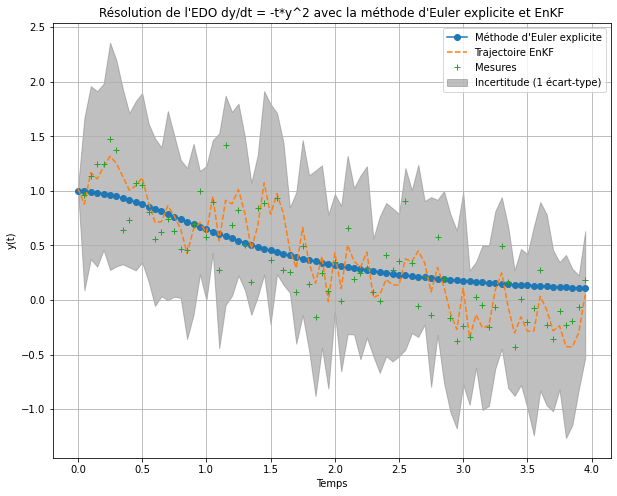

In [3]:
# Paramètres du filtre de Kalman d'ensemble
N = 20  # Nombre d'ensembles
dim_x = 1  # Dimension de l'état (y)
dim_z = 1  # Dimension de l'observation (y)

# Matrices de covariance
Q = np.array([[0.01]])
R = np.eye(dim_z) * 0.1  # Covariance d'observation
P = np.array([[0.01]])

# Initialiser l'ensemble
ensemble = np.zeros((N, dim_x))
for i in range(N):
    ensemble[i] = y0 + np.random.randn(dim_x) * 0.1  # Perturbation autour de l'état initial

# Définir les fonctions de transition d'état et de mesure
def hx(x):
    return x

def fx(x, dt):
    t = dt * (len(x) - 1)  # Calcul du temps actuel
    dy_dt = -t * x**2
    return x + dy_dt * dt

# Initialisation du filtre de Kalman d'ensemble
initial_state = np.mean(ensemble, axis=0)
enkf = EnKF(x=initial_state, P=P, dim_z=dim_z, fx=fx, hx=hx, dt=dt, N=N)

# Stocker les résultats
ensemble_trajectories = np.zeros((num_steps, dim_x))
ensemble_trajectories[0] = initial_state

# Stocker les incertitudes
ensemble_uncertainties = np.zeros((num_steps, dim_x))

measurements = []

# Filtre de Kalman d'ensemble
for i in range(1, num_steps):
    enkf.predict()
    z = y_euler[i] + multivariate_normal([0], R)  # Observation bruitée
    enkf.update(z)
    ensemble_trajectories[i] = np.mean(enkf.sigmas, axis=0)
    ensemble_uncertainties[i] = np.std(enkf.sigmas, axis=0)
    measurements.append(z)

# Tracé des résultats
plt.figure(figsize=(10, 8))

# Méthode d'Euler
plt.plot(np.arange(num_steps) * dt, y_euler, label='Méthode d\'Euler explicite', marker='o')

# Trajectoire EnKF
plt.plot(np.arange(num_steps) * dt, ensemble_trajectories, label='Trajectoire EnKF', linestyle='--')

# Mesures
measurements = np.array(measurements).flatten()
plt.plot(np.arange(1, num_steps) * dt, measurements, label='Mesures', linestyle='none', marker='+')

# Incertitude
plt.fill_between(np.arange(num_steps) * dt, 
                 ensemble_trajectories.flatten() - ensemble_uncertainties.flatten(), 
                 ensemble_trajectories.flatten() + ensemble_uncertainties.flatten(), 
                 color='gray', alpha=0.5, label='Incertitude (1 écart-type)')

plt.xlabel('Temps')
plt.ylabel('y(t)')
plt.title('Résolution de l\'EDO dy/dt = -t*y^2 avec la méthode d\'Euler explicite et EnKF')
plt.legend()
plt.grid(True)
plt.show()

# 2 - Second test:
$$
\frac{dy}{dt}=-y + cos(t)
$$

We test solving this Ode with 4 differents methods: 
- Explicit Euler
- Ensemble Kalman Filter (EnKF)

**Use Explicit Euler**

The explicit Euler method provides a stable and smooth estimation, showing the expected behavior of the equation $\frac{dy}{dt} = -y + cos(t)$.

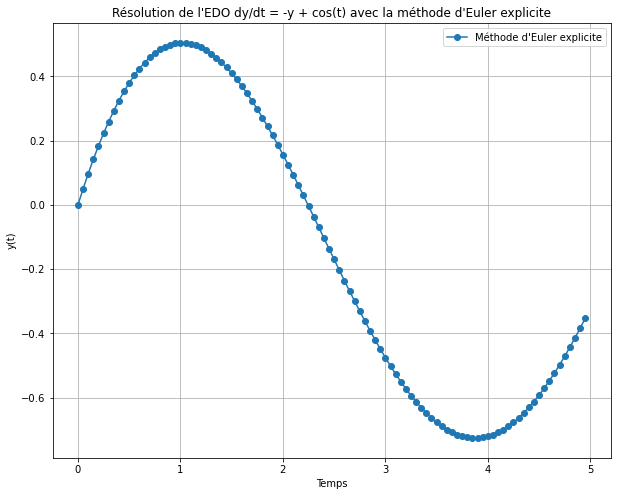

In [4]:
# Paramètres
dt = 0.05  # Pas de temps
T = 5.0  # Durée totale de la simulation

# Conditions initiales
y0 = 0.0  # Valeur initiale de y à t=0

# Nombre de pas de temps
num_steps = int(T / dt)

# Initialisation du tableau pour stocker les valeurs de y
y_euler = np.zeros(num_steps)
y_euler[0] = y0  # Initialisation de y à t=0

# Résolution de l'EDO avec la méthode d'Euler explicite
for i in range(1, num_steps):
    t = i * dt
    dy_dt = - y_euler[i-1] +  np.cos(t)  # Calcul de dy/dt à l'instant t_i-1
    y_euler[i] = y_euler[i-1] + dy_dt * dt  # Méthode d'Euler: calcul de y à l'instant t_i

# Visualisation des résultats
plt.figure(figsize=(10, 8))

# Méthode d'Euler
plt.plot(np.arange(num_steps) * dt, y_euler, label='Méthode d\'Euler explicite', marker='o')

plt.xlabel('Temps')
plt.ylabel('y(t)')
plt.title('Résolution de l\'EDO dy/dt = -y + cos(t) avec la méthode d\'Euler explicite')
plt.legend()
plt.grid(True)
plt.show()

**Use EnKF**

The EnKF trajectory shows greater variability around the Euler solution, which is expected due to the incorporation of noisy measurements. This trajectory captures the general trend of the explicit Euler trajectory while displaying the oscillations caused by the observations.


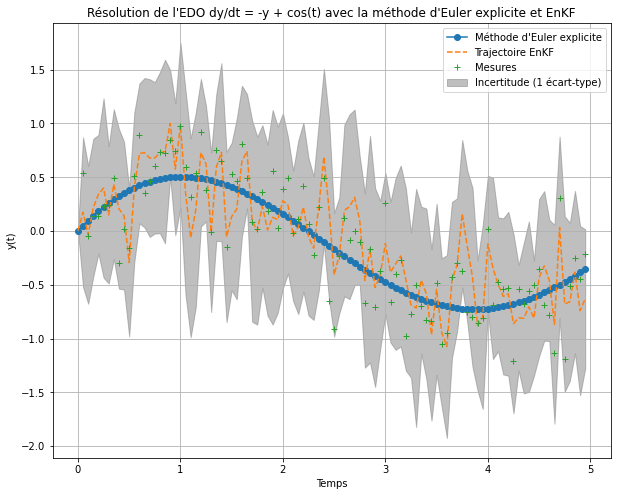

In [5]:
# Paramètres du filtre de Kalman d'ensemble
N = 20  # Nombre d'ensembles
dim_x = 1  # Dimension de l'état (y)
dim_z = 1  # Dimension de l'observation (y)

# Matrices de covariance
Q = np.array([[0.01]])
R = np.eye(dim_z) * 0.1  # Covariance d'observation
P = np.array([[0.01]])

# Initialiser l'ensemble
ensemble = np.zeros((N, dim_x))
for i in range(N):
    ensemble[i] = y0 + np.random.randn(dim_x) * 0.1  # Perturbation autour de l'état initial

# Définir les fonctions de transition d'état et de mesure
def hx(x):
    return x

def fx(x, dt):
    t = dt * (len(x) - 1) 
    dy_dt = -x + np.cos(t)
    return x + dy_dt * dt

# Initialisation du filtre de Kalman d'ensemble
initial_state = np.mean(ensemble, axis=0)
enkf = EnKF(x=initial_state, P=P, dim_z=dim_z, fx=fx, hx=hx, dt=dt, N=N)

# Stocker les résultats
ensemble_trajectories = np.zeros((num_steps, dim_x))
ensemble_trajectories[0] = initial_state

# Stocker les incertitudes
ensemble_uncertainties = np.zeros((num_steps, dim_x))

measurements = []

# Filtre de Kalman d'ensemble
for i in range(1, num_steps):
    enkf.predict()
    z = y_euler[i] + multivariate_normal([0], R)  # Observation bruitée
    enkf.update(z)
    ensemble_trajectories[i] = np.mean(enkf.sigmas, axis=0)
    ensemble_uncertainties[i] = np.std(enkf.sigmas, axis=0)
    measurements.append(z)

# Tracé des résultats
plt.figure(figsize=(10, 8))

# Méthode d'Euler
plt.plot(np.arange(num_steps) * dt, y_euler, label='Méthode d\'Euler explicite', marker='o')

# Trajectoire EnKF
plt.plot(np.arange(num_steps) * dt, ensemble_trajectories, label='Trajectoire EnKF', linestyle='--')

# Mesures
measurements = np.array(measurements).flatten()
plt.plot(np.arange(1, num_steps) * dt, measurements, label='Mesures', linestyle='none', marker='+')

# Incertitude
plt.fill_between(np.arange(num_steps) * dt,
                 ensemble_trajectories.flatten() - ensemble_uncertainties.flatten(),
                 ensemble_trajectories.flatten() + ensemble_uncertainties.flatten(),
                 color='gray', alpha=0.5, label='Incertitude (1 écart-type)')

plt.xlabel('Temps')
plt.ylabel('y(t)')
plt.title('Résolution de l\'EDO dy/dt = -y + cos(t) avec la méthode d\'Euler explicite et EnKF')
plt.legend()
plt.grid(True)
plt.show()